In [140]:
import pyam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.lines import Line2D
plt.style.use(
    "plotting_template.mplstyle"
)

In [3]:
data_folder = Path(
    "..","data"
)

In [4]:
data_file = Path(
    data_folder / "AR6_Scenarios_Snapshot.xlsx"
)

In [5]:
meta_file = Path(
    data_folder / "AR6_Scenarios_Updated_Meta.xlsx"
)

In [7]:
df_ar6 = pyam.IamDataFrame(data_file)

pyam.core - INFO: Reading file ../data/AR6_Scenarios_Snapshot.xlsx
pyam.core - INFO: Reading meta indicators


In [8]:
df_ar6.load_meta(meta_file)

pyam.core - INFO: Reading meta indicators


In [86]:
df_ar6_c1 = df_ar6.filter(
    Category = "C1",
    variable = "AR6 climate diagnostics*"
)

# Pull out the 1.5 and 2 degree exceedance probabilities

In [87]:
df_ar6_c1_exceedance_magicc = df_ar6_c1.filter(
    variable = [ 
        "AR6 climate diagnostics|Exceedance Probability 2.0C|MAGICCv7.5.3",
        "AR6 climate diagnostics|Exceedance Probability 1.5C|MAGICCv7.5.3"
    ],
    year = range(1990, 2101)
).timeseries()

In [88]:
df_ar6_c1_exceedance_magicc

1995  \
model             scenario              region variable                                           unit                  
AIM/CGE 2.1       CD-LINKS_NPi2020_400  World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
AIM/CGE 2.2       EN_NPi2020_300f       World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                  EN_NPi2020_600        World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
...                                                                                                               ...   
WITCH-GLOBIOM 3.1 SSP4-19               World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi2020_400  World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                  CD-LINKS_NPi2020_1000 World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   

                                                                                                                 1996  \
model             scenario              region variable                                           unit                  
AIM/CGE 2.1       CD-LINKS_NPi2020_400  World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
AIM/CGE 2.2       EN_NPi2020_300f       World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                  EN_NPi2020_600        World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
...                                                                                                               ...   
WITCH-GLOBIOM 3.1 SSP4-19               World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi2020_400  World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                  CD-LINKS_NPi2020_1000 World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   

                                                                                                                 1997  \
model             scenario              region variable                                           unit                  
AIM/CGE 2.1       CD-LINKS_NPi2020_400  World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
AIM/CGE 2.2       EN_NPi2020_300f       World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
                  EN_NPi2020_600        World  AR6 climate diagnostics|Exceedance Probability ... dimensionless   NaN   
...                                                                                                               ... 

In [89]:
for y in range(2101, 2111):
    df_ar6_c1_exceedance_magicc[y] = df_ar6_c1_exceedance_magicc[2100]

In [90]:
df_ar6_c1_exceedance_21yr = df_ar6_c1_exceedance_magicc.rolling(21, center=True, axis=1).mean().dropna(axis=1)

In [91]:
df_ar6_c1_exceedance_21yr

2010  \
model             scenario              region variable                                           unit                      
AIM/CGE 2.1       CD-LINKS_NPi2020_400  World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.002063   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.000000   
AIM/CGE 2.2       EN_NPi2020_300f       World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.001905   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.000000   
                  EN_NPi2020_600        World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.001905   
...                                                                                                                   ...   
WITCH-GLOBIOM 3.1 SSP4-19               World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.000000   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi2020_400  World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.001587   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.000000   
                  CD-LINKS_NPi2020_1000 World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.001508   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.000000   

                                                                                                                     2011  \
model             scenario              region variable                                           unit                      
AIM/CGE 2.1       CD-LINKS_NPi2020_400  World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.004365   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.000000   
AIM/CGE 2.2       EN_NPi2020_300f       World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.004127   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.000000   
                  EN_NPi2020_600        World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.004127   
...                                                                                                                   ...   
WITCH-GLOBIOM 3.1 SSP4-19               World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.000000   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi2020_400  World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.002857   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.000000   
                  CD-LINKS_NPi2020_1000 World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.002619   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.000000   

                                                                                                                     2012  \
model             scenario              region variable                                           unit                      
AIM/CGE 2.1       CD-LINKS_NPi2020_400  World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.008730   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.000000   
AIM/CGE 2.2       EN_NPi2020_300f       World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.008016   
                                               AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.000000   
                  EN_NPi2020_600        World  AR6 climate diagnostics|Exceedance Probability ... dimensionless  0.

In [92]:
df_ar6_c1_exceedance_21yr.reset_index(inplace = True)

In [93]:
df_ar6_c1_exceedance_21yr["variable"] = df_ar6_c1_exceedance_21yr["variable"].apply(
    lambda x: x.replace("Exceedance Probability", "Exceedance Probability rolling mean")
)

In [94]:
df_ar6_c1_exceedance_21yr = pyam.IamDataFrame(df_ar6_c1_exceedance_21yr)

pyam.plotting - INFO: >=13 labels, not applying legend


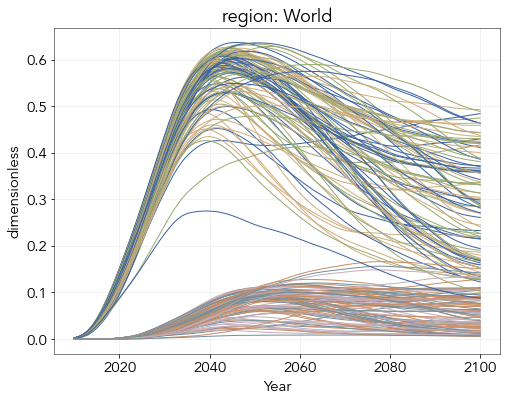

In [95]:
df_ar6_c1_exceedance_21yr.plot()

# First we use this to categorise the scenarios into AR6 C1

In [96]:
pyam.categorize(
    df_ar6_c1_exceedance_21yr,
    exclude = False,
    value = "1.5C low overshoot",
    name = "category_ar6_check",
    criteria={"AR6 climate diagnostics|Exceedance Probability rolling mean 1.5C|MAGICCv7.5.3": {"up": 0.67}}
)

pyam.core - INFO: 97 scenarios categorized as `category_ar6_check: 1.5C low overshoot`


In [97]:
df_ar6_c1_exceedance_21yr.meta.category_ar6_check.unique()

array(['1.5C low overshoot'], dtype=object)

Now we append this.

In [98]:
df_ar6_c1.append(
    df_ar6_c1_exceedance_21yr,
    inplace = True
)

In [99]:
def warming_exceedance_prob(x):
    return "AR6 climate diagnostics|Exceedance Probability rolling mean {}C|MAGICCv7.5.3".format(x)

In [100]:
df_ar6_c1.set_meta(
    meta = "uncategorised",
    name = "temperature_new_rolling_mean"
)

In [101]:
pyam.categorize(
    df_ar6_c1,
    value = "Below 2C (90%)",
    name = "temperature_new_rolling_mean",
    criteria = {warming_exceedance_prob(2.0):{'up':0.10}}
)

pyam.core - INFO: 67 scenarios categorized as `temperature_new_rolling_mean: Below 2C (90%)`


In [102]:
df_ar6_c1.set_meta(
    meta = "Above 2C (90%)",
    name = "temperature_new_rolling_mean",
    index = df_ar6_c1.filter(
        temperature_new_rolling_mean = "uncategorised"
    )
)

In [103]:
df_ar6_c1.set_meta(
    meta = "uncategorised",
    name = "category_new_rolling_mean"
)

In [104]:
df_ar6_c1.set_meta(
    name = "category_new_rolling_mean",
    meta = "PA (Art 2 and 4)",
    index = df_ar6_c1.filter(
        temperature_new_rolling_mean = "Below 2C (90%)",
        Category = "C1",
        netzero = True
    )
)

In [105]:
df_ar6_c1.set_meta(
    name = "category_new_rolling_mean",
    meta = "Not PA",
    index = df_ar6_c1.filter(
        category_new_rolling_mean = "uncategorised"
    )
)

In [106]:
# Trial figure

In [107]:
# Compare exceedance probabilities

In [108]:
def plot_exceedance(ax, rolling_mean = False):
    if rolling_mean:
        exceedance_1p5 = "AR6 climate diagnostics|Exceedance Probability rolling mean 1.5C|MAGICCv7.5.3"
        exceedance_2p0 = "AR6 climate diagnostics|Exceedance Probability rolling mean 2.0C|MAGICCv7.5.3"

        df_ar6_c1.filter(
            variable = exceedance_1p5,
            category_new_rolling_mean = "PA (Art 2 and 4)"
        ).plot(color = "green", ax = ax[0])

        df_ar6_c1.filter(
            variable = exceedance_2p0,
            category_new_rolling_mean = "PA (Art 2 and 4)"
        ).plot(color = "green", ax = ax[1])

    else:
        exceedance_1p5 = "AR6 climate diagnostics|Exceedance Probability 1.5C|MAGICCv7.5.3"
        exceedance_2p0 = "AR6 climate diagnostics|Exceedance Probability 2.0C|MAGICCv7.5.3"
        df_ar6_c1.filter(
            variable = exceedance_1p5,
            category_new = "PA (Art 2 and 4)"
        ).plot(color = "green", ax = ax[0])

        df_ar6_c1.filter(
            variable = exceedance_2p0,
            category_new = "PA (Art 2 and 4)"
        ).plot(color = "green", ax = ax[1])

    df_ar6_c1.filter(
        variable = exceedance_1p5,
    ).plot(ax = ax[0], color = "grey", alpha = 0.1)

    df_ar6_c1.filter(
        variable = exceedance_2p0,
    ).plot(ax = ax[1], color = "grey", alpha = 0.1)
    ax[0].set_title("")
    ax[1].set_title("")
    ax[0].set_ylim(0, 0.7)
    ax[1].set_ylim(0, 0.3)

In [109]:
def plot_exceedance(ax, color, rolling_mean = False):
    if rolling_mean:
        exceedance_1p5 = "AR6 climate diagnostics|Exceedance Probability rolling mean 1.5C|MAGICCv7.5.3"
        exceedance_2p0 = "AR6 climate diagnostics|Exceedance Probability rolling mean 2.0C|MAGICCv7.5.3"

        df_ar6_c1.filter(
            variable = exceedance_1p5,
            category_new_rolling_mean = "PA (Art 2 and 4)"
        ).plot(color = color, ax = ax[0])

        df_ar6_c1.filter(
            variable = exceedance_2p0,
            category_new_rolling_mean = "PA (Art 2 and 4)"
        ).plot(color = color, ax = ax[1])

    else:
        exceedance_1p5 = "AR6 climate diagnostics|Exceedance Probability 1.5C|MAGICCv7.5.3"
        exceedance_2p0 = "AR6 climate diagnostics|Exceedance Probability 2.0C|MAGICCv7.5.3"
        df_ar6_c1.filter(
            variable = exceedance_1p5,
            category_new = "PA (Art 2 and 4)"
        ).plot(color = color, ax = ax[0])

        df_ar6_c1.filter(
            variable = exceedance_2p0,
            category_new = "PA (Art 2 and 4)"
        ).plot(color = color, ax = ax[1])

    df_ar6_c1.filter(
        variable = exceedance_1p5,
    ).plot(ax = ax[0], color = "grey", alpha = 0.1)

    df_ar6_c1.filter(
        variable = exceedance_2p0,
    ).plot(ax = ax[1], color = "grey", alpha = 0.1)
    ax[0].set_title("")
    ax[1].set_title("")
    ax[0].set_ylim(0, 0.7)
    ax[1].set_ylim(0, 0.3)

pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend


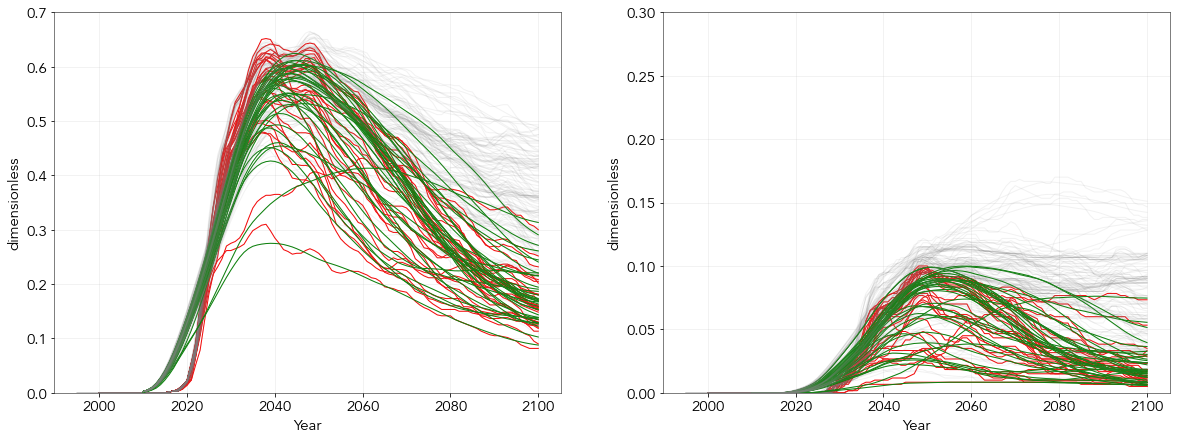

In [110]:
fig, ax = plt.subplots(1,2, figsize = (20, 7), sharex=True)

plot_exceedance(ax, color = "red", rolling_mean=False)
plot_exceedance(ax, color = "green", rolling_mean=True)

In [111]:
fig.savefig(
    "diagnostic_plot_1.png",
    dpi = 600
)

# Plot the 2030 emission levels

In [112]:
def plot_pathway_characteristics(ax, rolling_mean = True):
    if rolling_mean:
        lo_os = df_ar6_c1.meta
        art2 = df_ar6_c1.filter(category_new_rolling_mean = "PA (Art 2 and 4)").meta
    else:
        lo_os = df_ar6_c1.filter(category_new_rolling_mean = "Not PA").meta
        art2 = df_ar6_c1.filter(category_new = "PA (Art 2 and 4)").meta


    #############
    #PANEL 4
    #############
    p5 = ax.boxplot(
        (lo_os['Year of netzero CO2 emissions (Harm-Infilled) table']).dropna(), 
        positions = [0], 
        patch_artist=True
    )
    p6 = ax.boxplot(
        (art2['Year of netzero CO2 emissions (Harm-Infilled) table']).dropna(), 
        positions = [1],
        patch_artist=True
    )
    medians_p5 = [item.get_ydata()[0] for item in p5["medians"]]
    medians_p56 = [item.get_ydata()[0] for item in p6["medians"]]
    print(medians_p5, medians_p56)
    p7 = ax.boxplot(
        (lo_os['netzero|kyotoghg']).dropna(), 
        positions = [2], 
        patch_artist=True
    )
    p8 = ax.boxplot(
        (art2['netzero|kyotoghg']).dropna(), 
        positions = [3],
        patch_artist=True,
    )


    for p in [ p6, p8]:
        plt.setp(p['boxes'], color="#069f72")
        plt.setp(p['medians'], color='black')  

    for p in [ p5, p7]:
        plt.setp(p['boxes'], color="grey", alpha=0.7)
        plt.setp(p['medians'], color='black')  

    #ax.set_ylim(0, 50)
    #ax.set_xticks([0.5, 2.5])
    #ax.set_xticklabels(
    #    [ 
    #        "CO$_2$ Emissions\n2030", 
    #        "Kyoto GHG Emissions \n2030"
    #    ]
    #)

[2053.0] [2049.0]
[2052.0] [2049.0]


Text(0.5, 1.0, 'with 21yr rolling mean')

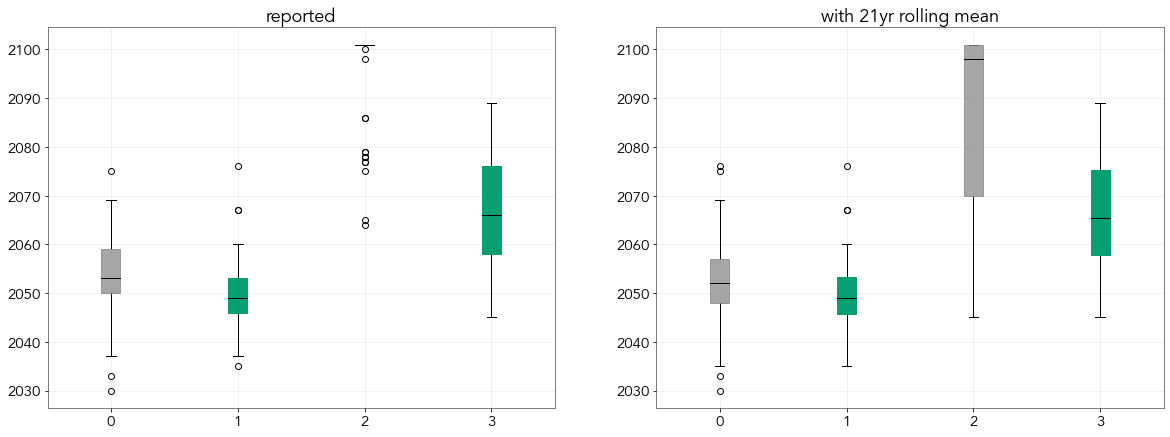

In [113]:
fig, ax = plt.subplots(1, 2, figsize = (20,7))
plot_pathway_characteristics(ax[0], rolling_mean=False)
plot_pathway_characteristics(ax[1], rolling_mean=True)


ax[0].set_title("reported")
ax[1].set_title("with 21yr rolling mean")

In [114]:
fig.savefig(
    "diagnostic_plot_2.png",
    dpi = 600
)

# Compare the SR1.5 and AR6 assessments.

In [160]:
df_sr15 = pyam.read_iiasa(
    "iamc15",
    model = "*",
    variable = ["AR5 climate diagnostics*", "Diagnostics*"],
    meta = ["category"]
)

pyam.iiasa - INFO: You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


In [174]:
df_sr15_lo_os = df_sr15.filter(
    category = ["Below 1.5C", "1.5C low overshoot"]
)

In [149]:
df_sr15_lo_os.index

MultiIndex([(          'AIM/CGE 2.0',            'ADVANCE_2020_1.5C-2100'),
            (          'AIM/CGE 2.0',                           'SSP1-19'),
            (          'AIM/CGE 2.0',                           'SSP2-19'),
            (          'AIM/CGE 2.1',              'CD-LINKS_NPi2020_400'),
            (          'AIM/CGE 2.1', 'TERL_15D_LowCarbonTransportPolicy'),
            (          'AIM/CGE 2.1',        'TERL_15D_NoTransportPolicy'),
            (        'C-ROADS-5.005',           'Ratchet-1.5-limCDR-noOS'),
            (        'C-ROADS-5.005',                 'Ratchet-1.5-noCDR'),
            (        'C-ROADS-5.005',            'Ratchet-1.5-noCDR-noOS'),
            (             'GCAM 4.2',                           'SSP1-19'),
            (          'IMAGE 3.0.1',                       'IMA15-AGInt'),
            (          'IMAGE 3.0.1',                         'IMA15-Def'),
            (          'IMAGE 3.0.1',                         'IMA15-Eff'),
            

In [172]:
common_scen_index = df_ar6_c1.index.intersection(df_sr15_lo_os.index)
common_scen_index

MultiIndex([(          'AIM/CGE 2.1',    'CD-LINKS_NPi2020_400'),
            (        'C-ROADS-5.005', 'Ratchet-1.5-limCDR-noOS'),
            (        'C-ROADS-5.005',       'Ratchet-1.5-noCDR'),
            (        'C-ROADS-5.005',  'Ratchet-1.5-noCDR-noOS'),
            (             'GCAM 4.2',                 'SSP1-19'),
            (  'MESSAGE-GLOBIOM 1.0',  'ADVANCE_2020_1.5C-2100'),
            (  'MESSAGE-GLOBIOM 1.0',      'EMF33_1.5C_cost100'),
            (  'MESSAGE-GLOBIOM 1.0',         'EMF33_1.5C_full'),
            (  'MESSAGE-GLOBIOM 1.0',                 'SSP2-19'),
            (        'POLES ADVANCE',  'ADVANCE_2020_1.5C-2100'),
            (          'POLES EMF33',      'EMF33_WB2C_cost100'),
            (          'POLES EMF33',         'EMF33_WB2C_full'),
            (          'POLES EMF33',       'EMF33_WB2C_nofuel'),
            (           'REMIND 1.7',        'CEMICS-1.5-CDR12'),
            (           'REMIND 1.7',         'CEMICS-1.5-CDR8'),
          

In [151]:
df_ar6_c1.set_meta(
    meta = False,
    name = "also_sr15"
)

In [152]:
df_ar6_c1.set_meta(
    meta = True,
    name = "also_sr15",
    index = common_scen_index
)

Now we do the same for SR1.5 scenarios.

In [175]:
sr15_scens = []

In [176]:
for mod, scen in common_scen_index:
    sr15_scens.append(
        df_sr15_lo_os.filter(
            model = mod,
            scenario = scen
        )
    )

In [177]:
sr15_scens = pyam.concat(sr15_scens)

In [164]:
sr15_scens.index

MultiIndex([(          'AIM/CGE 2.1',    'CD-LINKS_NPi2020_400'),
            (        'C-ROADS-5.005', 'Ratchet-1.5-limCDR-noOS'),
            (        'C-ROADS-5.005',       'Ratchet-1.5-noCDR'),
            (        'C-ROADS-5.005',  'Ratchet-1.5-noCDR-noOS'),
            (             'GCAM 4.2',                 'SSP1-19'),
            (  'MESSAGE-GLOBIOM 1.0',  'ADVANCE_2020_1.5C-2100'),
            (  'MESSAGE-GLOBIOM 1.0',      'EMF33_1.5C_cost100'),
            (  'MESSAGE-GLOBIOM 1.0',         'EMF33_1.5C_full'),
            (  'MESSAGE-GLOBIOM 1.0',                 'SSP2-19'),
            (        'POLES ADVANCE',  'ADVANCE_2020_1.5C-2100'),
            (          'POLES EMF33',      'EMF33_WB2C_cost100'),
            (          'POLES EMF33',         'EMF33_WB2C_full'),
            (          'POLES EMF33',       'EMF33_WB2C_nofuel'),
            (           'REMIND 1.7',        'CEMICS-1.5-CDR12'),
            (           'REMIND 1.7',         'CEMICS-1.5-CDR8'),
          

# Now plot per model and scenario - this is going to be a little painful

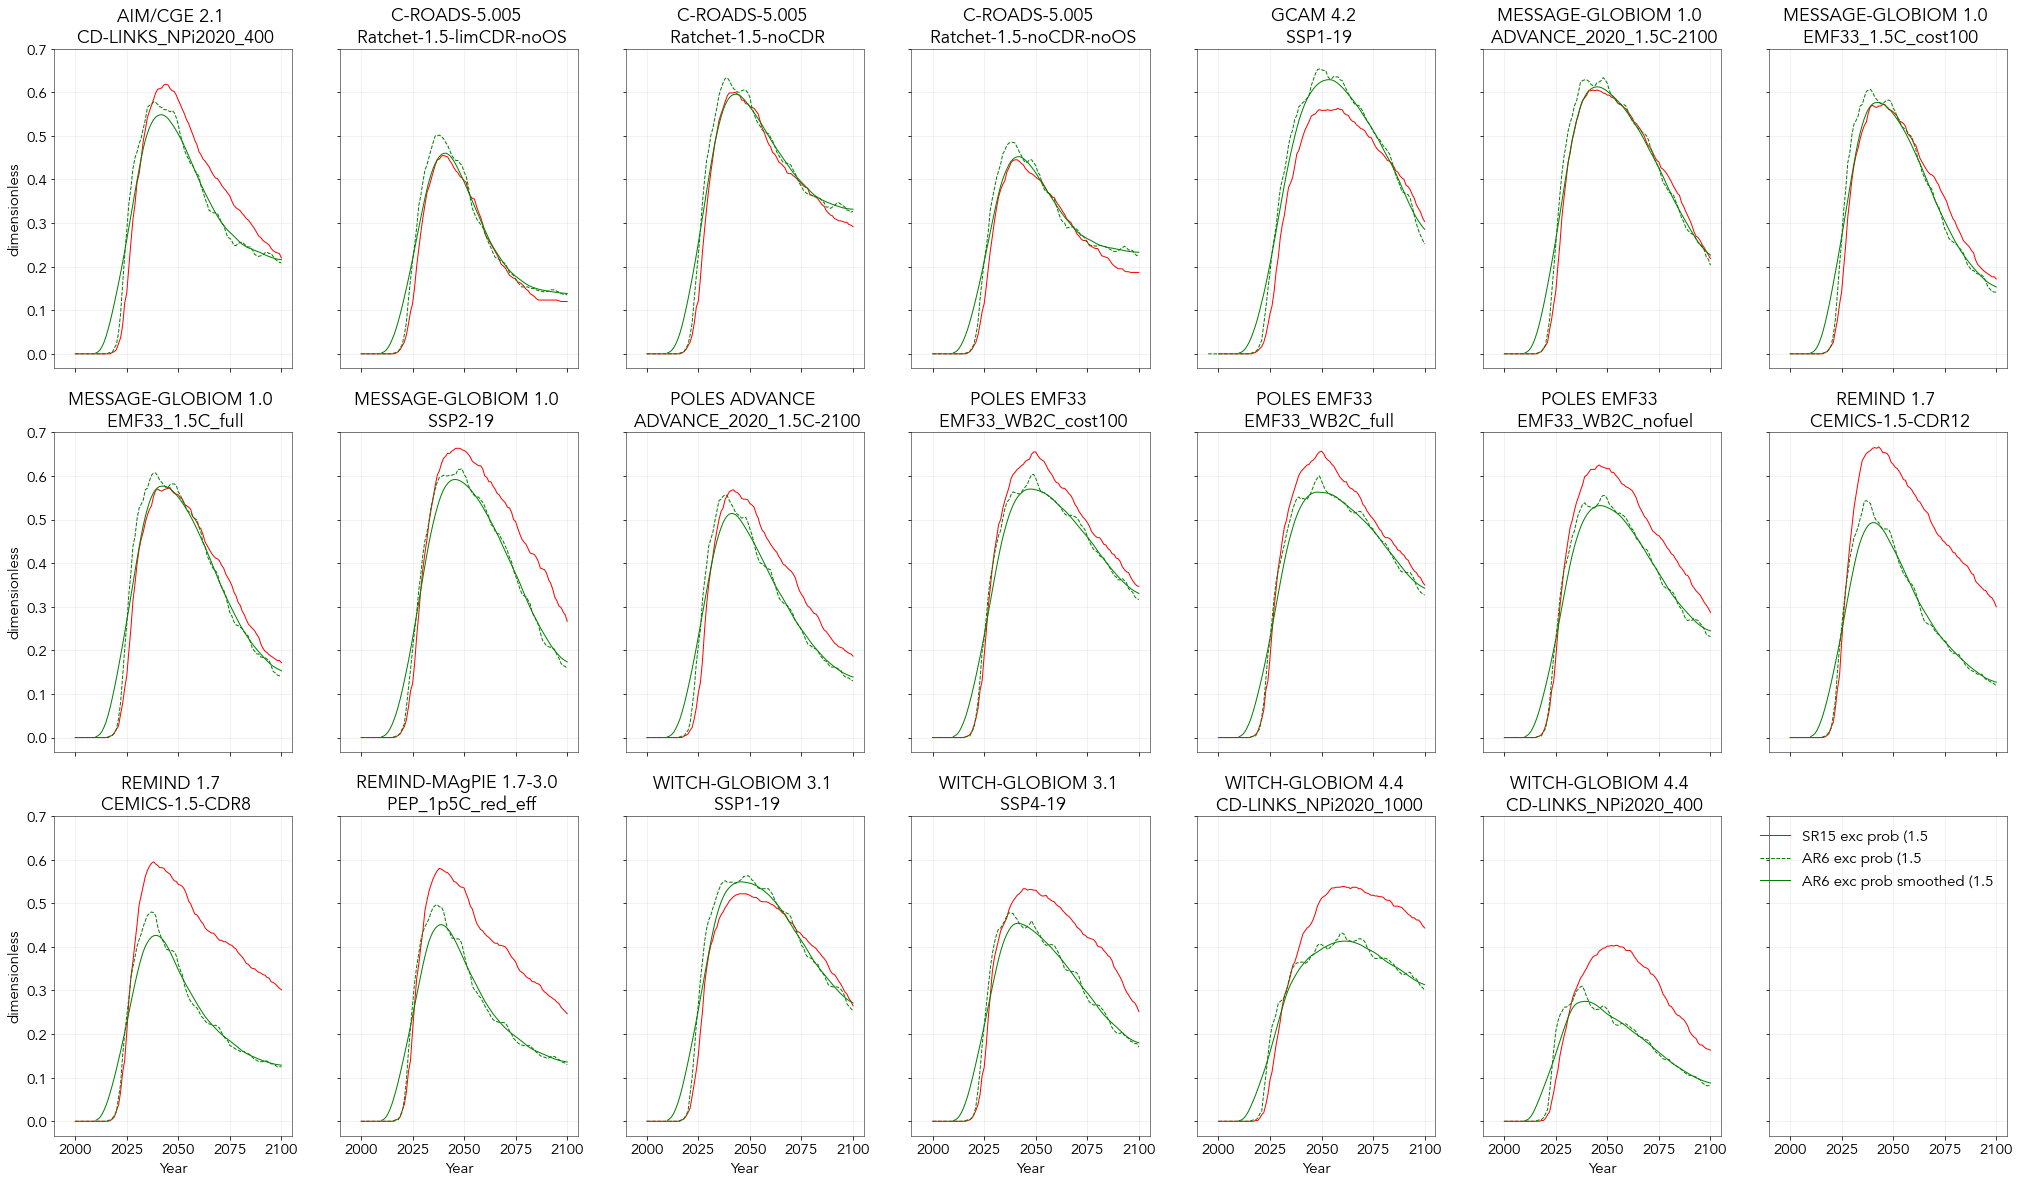

In [157]:
fig, ax = plt.subplots(3, 7, sharex = True, sharey=True, figsize = (35, 20))

i = j = 0

for mod, scen in common_scen_index:
    if j>6:
        i += 1
        j = 0
    # Plot SR15
    sr15_scens.filter(
        model = mod, 
        scenario = scen,
        variable = "AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6"
    ).plot(ax = ax[i,j], color = "red")
   

    # Plot AR6 raw
    df_ar6_c1.filter(
        model = mod,
        scenario = scen,
        variable = "AR6 climate diagnostics|Exceedance Probability 1.5C|MAGICCv7.5.3"
    ).plot(ax = ax[i,j], linestyle = "dashed", color = "green")

    # Plot AR6 smoothed
    df_ar6_c1.filter(
        model = mod,
        scenario = scen,
        variable = "AR6 climate diagnostics|Exceedance Probability rolling mean 1.5C|MAGICCv7.5.3"
    ).plot(ax = ax[i,j], color = "green")

    ax[i, j].set_title("{} \n {}".format(mod, scen))
    j += 1

custom_legend = [ 
    Line2D([0], [0], color = "red", label = "SR15 exc prob (1.5"),
    Line2D([0], [0], color = "green",linestyle="dashed", label = "AR6 exc prob (1.5"),
    Line2D([0], [0], color = "green", label = "AR6 exc prob smoothed (1.5"),
]
ax[2,6].legend(handles = custom_legend)

In [158]:
fig.savefig(
    "compare_sr15_ar6_overlap_exc1p5.png"
)

In [145]:
df_ar6.variable

['AR6 climate diagnostics|Effective Radiative Forcing|Basket|Greenhouse Gases|CICERO-SCM|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Greenhouse Gases|FaIRv1.6.2|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|CICERO-SCM|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|FaIRv1.6.2|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|CH4|CICERO-SCM|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|CH4|FaIRv1.6.2|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|CICERO-SCM|33.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|CICERO-SCM|5.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|CICERO-SCM|50.0th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|CICERO-SCM|67.0th Percentile',
 'AR6 climate diagnostics|Effec

In [178]:
sr15_scens.aggregate(
    variable = "Emissions|CO2",
    components = [
        'Diagnostics|MAGICC6|Harmonized Input|Emissions|CO2|AFOLU',
        'Diagnostics|MAGICC6|Harmonized Input|Emissions|CO2|Energy and Industrial Processes'
    ],
    append = True
)

In [181]:
sr15_scens.variable

['AR5 climate diagnostics|Concentration|CO2|FAIR|MED',
 'AR5 climate diagnostics|Concentration|CO2|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|Direct|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|Total|FAIR|MED',
 'AR5 climate diagnostics|Forcing|Aerosol|Total|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|CH4|FAIR|MED',
 'AR5 climate diagnostics|Forcing|CH4|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|CO2|FAIR|MED',
 'AR5 climate diagnostics|Forcing|CO2|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|F-Gases|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|FAIR|MED',
 'AR5 climate diagnostics|Forcing|Kyoto Gases|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|Montreal Protocol (orig.) gases|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|N2O|FAIR|MED',
 'AR5 climate diagnostics|Forcing|N2O|MAGICC6|MED',
 'AR5 climate diagnostics|Forcing|OtherGHGs|FAIR|MED',
